# Biol 359A  | Linear Algebra
### Spring 2022, Week 8
<hr>

Objectives:
-  Intuition about matrix multiplication  
-  Relationship between eigen vectors and types of matrices 
-  Introduce the covariance matrix 



In [ ]:
!git clone https://github.com/BIOL359A-FoundationsOfQBio-Spr22/week8_linearalgebra
!mkdir ./data
!cp week8_linearalgebra/data/* ./data
!cp week8_linearalgebra/clean_data.py ./
!pip install palmerpenguins

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
import ipywidgets as widgets
from palmerpenguins import load_penguins

%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

TITLE_FONT = 20
LABEL_FONT = 16
TICK_FONT = 16
FIG_SIZE = (10,10)
COLORS= ["#008080","#CA562C"]

sns.set(font_scale=1, rc={'figure.figsize':FIG_SIZE}) 
sns.set_style("white",  {'axes.linewidth': 2, 'axes.edgecolor':'black'})
plt.rc("axes.spines", top=False, right=False)

In [2]:
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1+y/3)
    b = min(1, 1-y/3)
    g = 1/4 + x/16
    return (r, g, b)

def gen_basic_plot(A, eigen=False):
    xvals = np.linspace(-4, 4, 9)
    yvals = np.linspace(-3, 3, 7)
    xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

    uvgrid = np.dot(A, xygrid)
    # Map grid coordinates to colors
    colors = list(map(colorizer, xygrid[0], xygrid[1]))

    # Plot grid points 
    plt.scatter(xygrid[0], xygrid[1], s=40, c=colors, edgecolor="none")
    # Set axis limits
    plt.grid(True)
    plt.axis("equal")
    plt.title("Original Grid")
    if eigen:
        eigen_values, eigen_vectors = np.linalg.eig(A)
    
        eig_vec1 = eigen_vectors[:,0]
        eig_vec2 = eigen_vectors[:,1]
        np.set_printoptions(precision=3)
        print(f"Eigen Vector: {eig_vec1} - Eigen Value: {eigen_values[0]:.2f}")
        print(f"Eigen Vector: {eig_vec2} - Eigen Value: {eigen_values[1]:.2f}")
        origin = [0,0]
        plt.quiver(*origin, *eig_vec1, color=['r'], scale=21)
        plt.quiver(*origin, *eig_vec2, color=['b'], scale=21) 


    plt.show()
    plt.scatter(uvgrid[0], uvgrid[1], s=40, c=colors, edgecolor="none")
    # Set axis limits
    plt.grid(True)
    plt.title("Transformed Grid")
    if eigen:
        plt.quiver(*origin, *eig_vec1, color=['r'], scale=21)
        plt.quiver(*origin, *eig_vec2, color=['b'], scale=21)
    plt.axis("equal")
    plt.show()
    

def plot_wrapper(a=2,b=1,c=-1,d=1, eigen=False):
    A = np.column_stack([[a, b], [c, d]])
    gen_basic_plot(A, eigen=eigen)



We are going to start with the following matrix:

$$\begin{bmatrix} 2 & 1 \\ -1 & 1 \\ \end{bmatrix}$$

(This matrix has no real eigen vectors)

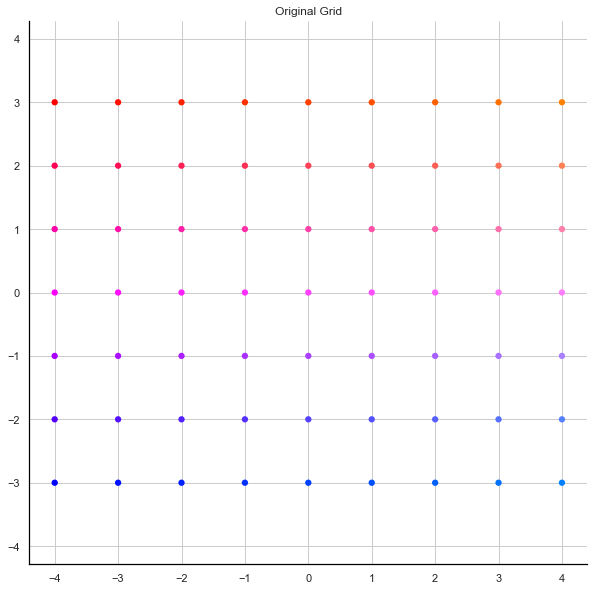

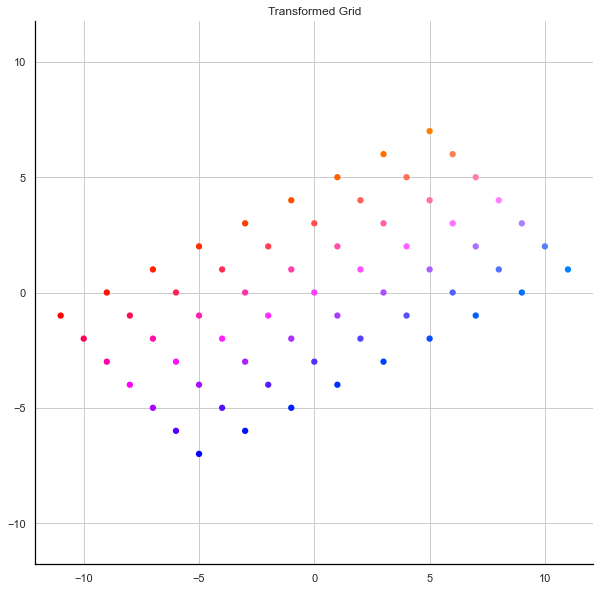

In [3]:
plot_wrapper(a=2,b=1,c=-1,d=1, eigen=False)

This matrix has real eigen vectors:

$$\begin{bmatrix} 5 & 1 \\ 4 & 2 \\ \end{bmatrix}$$

Eigen Vector: [0.97  0.243] - Eigen Value: 6.00
Eigen Vector: [-0.707  0.707] - Eigen Value: 1.00


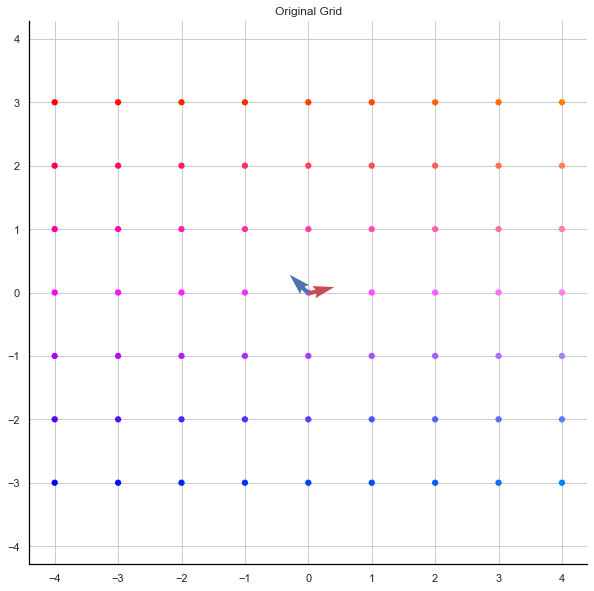

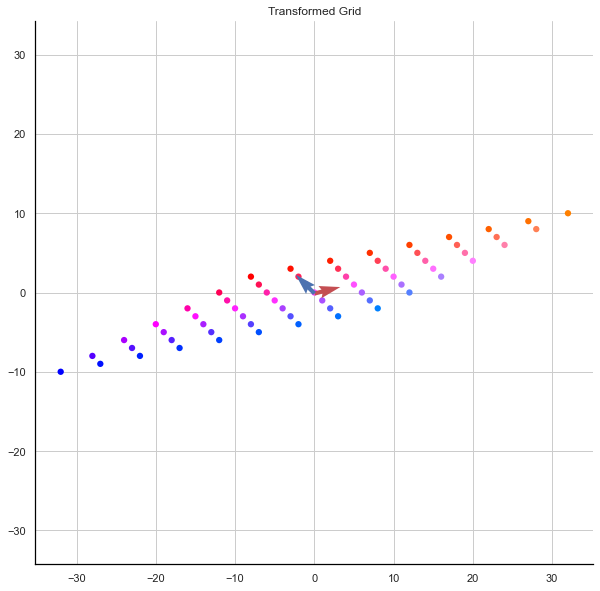

In [4]:
plot_wrapper(a=5, b=1, c=4,d=2, eigen=True)

This matrix has real and orthogonal eigenvectors:
$$\begin{bmatrix} 3 & 4 \\ 4 & 2 \\ \end{bmatrix}$$

Eigen Vector: [0.75  0.662] - Eigen Value: 6.53
Eigen Vector: [-0.662  0.75 ] - Eigen Value: -1.53


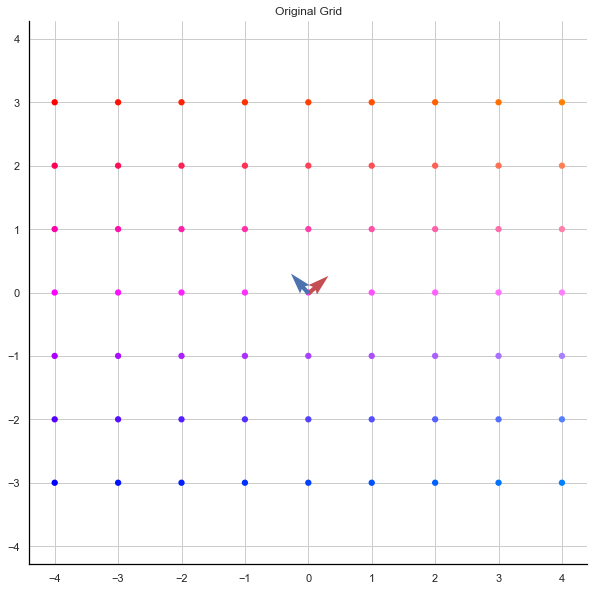

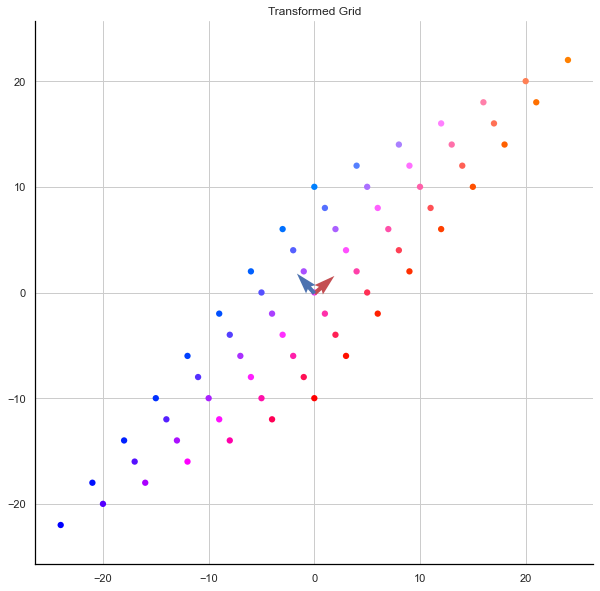

In [5]:
plot_wrapper(a=3, b=4, c=4,d=2, eigen=True)

Introducing the Covariance Matrix:

$$ var(x) = E[(x-\mu_{x})^2] $$
Recall when we defined the covariance:

$$ cov(x,y) = E[x-\mu_{x}]E[y-\mu_{y}] $$

So for example, If I had a data matrix, with N observations, and 3 features - a, b, and c - I will define my covariance matrix $\Sigma$ as:
 
$$ \Sigma = \begin{bmatrix} var(a) & cov(a,b) & cov(a,c)\\ cov(b,a) & var(b)& cov(b,c) \\ cov(c,a) & cov(c,b) & var(c) \end{bmatrix}$$

Which we usually estimate with:

$$ \frac{1}{N-1} XX^T = \hat{\Sigma} $$

These matrices will be incredibly important next week.

In [18]:
penguins=load_penguins()
penguins.dropna(inplace=True)
features=["bill_length_mm", "bill_depth_mm", "flipper_length_mm","body_mass_g"]
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [20]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


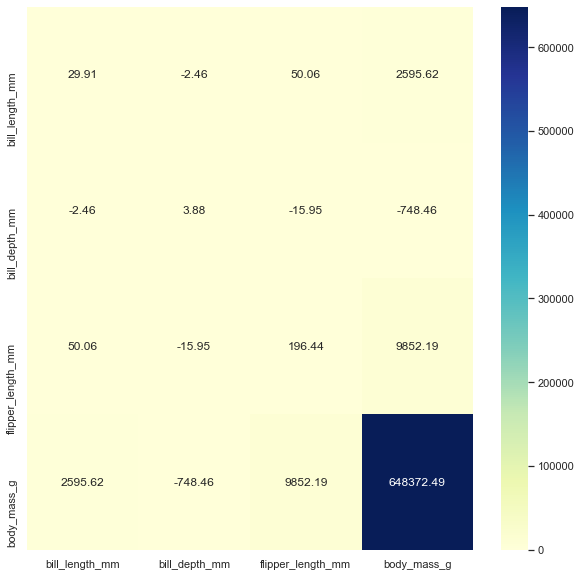

In [23]:
cov = np.cov(penguins[features], rowvar=False)
sns.heatmap(cov, annot=True, fmt='.2f', xticklabels=features, yticklabels=features, cmap='YlGnBu')
plt.show()